In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [42]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [43]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [45]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [46]:
df.name.unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [47]:
df.year.value_counts(dropna=False)

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

In [48]:
df.km_driven.value_counts(dropna=False)

70000     236
80000     228
50000     222
120000    220
60000     215
         ... 
19107       1
32077       1
6480        1
118400      1
112198      1
Name: km_driven, Length: 770, dtype: int64

In [49]:
df.fuel.value_counts(dropna=False)

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [50]:
df.seller_type.value_counts(dropna=False)

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [51]:
df.transmission.value_counts(dropna=False)

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [52]:
#df["transmission"] = df["transmission"].map({"Manual": 0, "Automatic":1})

In [53]:
df.owner.value_counts(dropna=False)

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [54]:
#df.stack().str.get_dummies().sum(level=0)

In [75]:
df_dummies = pd.get_dummies(data = df, columns=["name", "fuel", "seller_type", "transmission", "owner"]).astype(int)
df_dummies

,year,selling_price,km_driven,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,name_Audi A4 3.0 TDI Quattro,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,2007,135000,50000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,2012,600000,100000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,2017,250000,46000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,2014,450000,141000,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4336,2014,409999,80000,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4337,2009,110000,83000,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4338,2016,865000,90000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


In [85]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Columns: 1509 entries, year to owner_Third Owner
dtypes: int32(1509)
memory usage: 25.0 MB


In [76]:
#print(df_dummies.to_string(index=False))

<Figure size 1080x720 with 0 Axes>

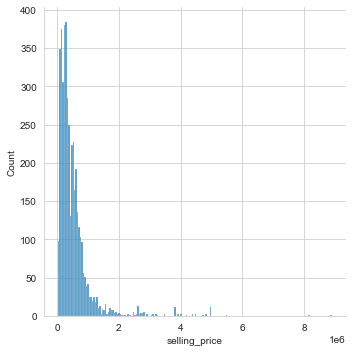

In [77]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.displot(df.selling_price)
plt.show()

In [78]:
df.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


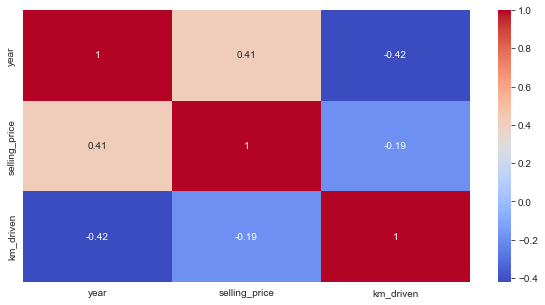

In [79]:
plt.figure(figsize=(10,5))
correlations = df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [80]:
predict = "selling_price"

In [81]:
X = np.array(df.drop([predict], 1))
y = np.array(df[predict])

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_17372\313259242.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop([predict], 1))


In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 101)

In [83]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


ValueError: could not convert string to float: 'Hyundai Santro Xing GL Plus'

In [84]:
from sklearn.metrics import mean_absolute_error
model.score(X_test, predictions)

NameError: name 'predictions' is not defined